In [24]:
from PIL import Image
import httpx
import collections
import operator
import datetime

```{=latex}
\usepackage{hyperref}
\usepackage{graphicx}
\usepackage{listings}
\usepackage{textcomp}
\usepackage{fancyvrb}

\newcommand{\passthrough}[1]{\lstset{mathescape=false}#1\lstset{mathescape=true}}

\title{Jupyter as Your Incident Management Tool}
\subtitle{DevOps as Science}
\author{Moshe Zadka -- https://cobordism.com}
\date{2020}

\begin{document}
\begin{titlepage}
\maketitle
\end{titlepage}

\frame{\titlepage}
```

```{=latex}
\begin{frame}
\frametitle{Acknowledgement of Country}

Belmont (in San Francisco Bay Area Peninsula)

Ancestral homeland of the Ramaytush Ohlone

\end{frame}
```

## Intro to Jupyter

### Notebooks

```{=latex}
\begin{frame}
\frametitle{Jupyter Notebooks}

\begin{itemize}
\item Language agnostic console
\item Saves inputs/outputs in JSON
\item Can export to HTML, Markdown, etc.
\end{itemize}
\end{frame}
```

### Kernels

```{=latex}
\begin{frame}
\frametitle{Jupyter Kernels}

\begin{itemize}
\item Language execution engine
\item IPyKernel in a virtual environment
\end{itemize}
\end{frame}
```

### Data Science Origins

```{=latex}
\begin{frame}
\frametitle{Data Science Origins}

\begin{itemize}
\item Sharing work
\item Executable format
\item Exploration
\end{itemize}
\end{frame}
```

## Demo incident -- slowdown

### Stack

```{=latex}
\begin{frame}
\frametitle{Imaginary Stack}

\begin{itemize}
\item Some vague "Service"
\item Our team is in charge of its SLAs
\item As luck would have it, a page comes in...
\end{itemize}
\end{frame}
```

### Symptom

```{=latex}
\begin{frame}
\frametitle{Symptom}

\begin{itemize}
\item P90 latency is spiking
\item Each server has different "typical behavior"
\item Figure out which server is misbehaving and fix
\end{itemize}
\end{frame}
```

### Spoiler

```{=latex}
\begin{frame}
\frametitle{Spoiler}

\begin{itemize}
\item Not a detective story! 
\item Core file dumped --> some queries take too long
\end{itemize}
\end{frame}
```

## Querying and analyzing operational data

### Query

```{=latex}
\begin{frame}
\frametitle{Spoiler}
```

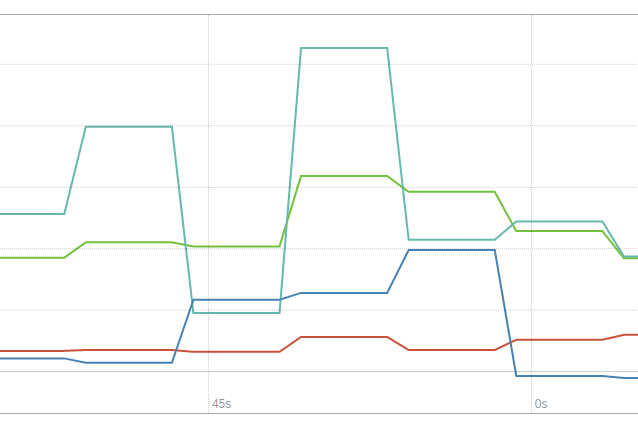

In [10]:
Image.open("prometheus.png")

```{=latex}
\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{Query Data}
```

In [32]:
now = datetime.datetime.now()
five_minutes_agp = now - datetime.timedelta(minutes=5)
data = httpx.get(f"http://localhost:9090/api/v1/query_range?query=level"
                 f"&start={five_minutes_agp.timestamp()}&end={now.timestamp()}&step=10s").json()

In [43]:
data["data"]["result"][0]["metric"], data["data"]["result"][0]["values"][:2]

({'__name__': 'level',
  'instance': 'localhost:8080',
  'job': 'my_service',
  'which': 'object1'},
 [[1604886057.266, '0.8839239836710062'],
  [1604886067.266, '2.3637557971523058']])

```{=latex}
\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{Analyze Data}
```

In [44]:
amplitudes = {}
for result in data["data"]["result"]:
    which = result["metric"]["which"]
    values = [float(value) for when, value in result["values"]]
    amplitudes[which] = max(values) - min(values)
max(amplitudes.items(), key=operator.itemgetter(1))

('object4', 13.641418227003584)

```{=latex}
\end{frame}
```

```{=latex}
\begin{frame}
\frametitle{We Know The Culprit}

That dastardly object4!\pause

Now let's find out what the problem is.
\end{frame}
```

## Using Cloud API from Jupyter

### Boto3

### Check EC2 Instances


## Using Paramiko

### Paramiko

### Loop Over Instances

### Check Load

## Attach Notebooks

### Export to HTML

### Attach Notebook and HTML

## Final Thoughts

### Not Auditing Tool

### Observable

### Documenting

### Conclusion


```{=latex}
\end{document}
```